# Git, github

In the live versions of these classes, we use the version control system git and git hosting service github. If you work in data science should have a working knowledge of both git and at least one cloud hosting service (like github).
For git, you work in a *repository*, which is basically a project directory on your
computer with some extra files that help git work. Git is then used for *version control*
so that you keep track of states of your project. Github, is a hosting service for
git repositories. Typically, you have your repository on your computer and you coordinate
it with the one on the server. Github is just one of several hosting services, bitbucket
is another, or you could even relatively easily start your own. However, github has front
end web services that allows you to interact with your remote repository easily. This is
very convenient. 

## The least you need to know
I'm not going to fully recreate git / github tutorials here; [here's one I recommend](https://seankross.com/the-unix-workbench/git-and-github.html) by Sean Kross. Instead, I'm going to go through a typical git / github workflow.

1. **Initialization** I almost always initialize my git repository on github with a `readme.md` file.
2. **Clone** I typically *clone* the repository to my local computer using the command line or a local git gui that works with github, like [this one](https://desktop.github.com/). Note that you only have to clone the repo once. After it's cloned
you have a full local copy of the repository.
3. **add** new files to track and **stage** them after I've worked with them.
4. **commit** the changes to the local repository with a meaningful commit message.
5. **push** the changes to the repository.
6. If there's changes on the remote repository not represented in my local repository, I **pull** those changes to my local repo.

For larger projects, you're likely  working with multiple people, some of whom you've given access to your remote repository and
some of whom you have not. The ones who can't directly push to the remote repo might have their own version of the
code and their own version on github. If they think you should incorporate those changes, they might issue a **pull request** to
you. You can then opt to pull their changes into your repo on github, then pull them from github to your local repo. One of the
reasons why services like github and bitbucket are so popular is that they make this coordination fairly easy, along with having
nice project messaging and management tools. 

In our class, we use github classroom. For github classroom, you'll get a link to a repo to put your submission files into. When you push to the remote repository, you'll have submitted. *But, up to the due date you can make changes an push again.* 

## A little more detail

### Getting started
Git is a version control system invented by Linus Torvalds, the invetor of the linux operating system. A github repository is a directory that the software git is using to keep track of versions. Install [git](https://git-scm.com/book/en/v2/Getting-Started-Installing-Git), it's already installed on most cloud services and many operaiting systems.
You can initialize a repository in a directory with the command `git init` in that directory. Honestly, I almost never start a git repo this way, because I've connected my repo to a cloud server. But, more on that later. After you've initialized it, your git repo is a locally version controlled system.

### Adding files

OK, now you want to add some of your files to your repo. You have a directory You can add files with the command
```
git add FILENAME
```
The file `FILENAME` is now staged to be part of the repository, but isn't added yet!  Files that you haven't added won't be tracked. This is good, since there's many files, llike log files, that we don't want to track. 
You only need to add the files once, then they are being tracked. Try it out with a readme markdown file in your repository.

### Checking status
One of the most useful git commands is 
```
git status
```
This gives the status of which files are being tracked, which are not and which have changes.


### Commiting changes
You have to actually commit your changes to the repository to have them represented. Committing changes is a local operation, subsequently, we'll show you how to coordinate with a remote repository. Here's the command I use to commit most often
```
git commit -a -m "COMMIT MESSAGE"
``` 
Here the flag `-a` means commit all files staged for commits. You can also commit individual files or a collection of specific files. The `-m "COMMIT MESSAGE"` is the message associated with your commit. Make your commit messages more informative. If you don't add `-m` github will bring up an editor for you to enter your commit message.


### Remote repositories
Git becomes much more useful when it's coordinated with a remote repository. Github is a server for hosting remote git repositories, there are several others, bitbucket is an example. Github also includes a great deal of functionality for working with the remote repository through the website. There's many git and github guis that you could use if you want. I always liked to github one and magit in emacs.

#### Connecting your remote and local repos
You need to connect your local repo to the remote repo. First create a version of the repo on github (actually then it gives you instructions). Then you can either

  1. *Clone* the repo from the server `git clone REMOTE SERVER`
  2. Connect the server to your local repository 

For 2. you use a command like:

```
git remote add origin git@github.com:USERNAME/REPONAME.git
```

Personally, I find it easier just to create the repo on github and clone it. You can clone over ssh or https, if you don't know what ssh is use https and then switch over to ssh as you learn how to use it.

#### Pushing changes 

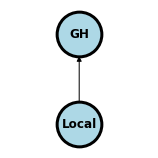

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#import numpy as np
#import sklearn as skl

plt.figure(figsize=[2, 2])
G = nx.DiGraph()

G.add_node("GH",    pos = (.5, 1) )
G.add_node("Local", pos = (.5, 0))
#G.add_edge("GH", "Local")
G.add_edge("Local", "GH")
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 2000,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.3, 1.3])
ax.set_ylim([-.3, 1.3])
plt.show()


You push from the repo you're working on to another (remote repo). So, for me, this typically means pushing from my local computer repo to github or to a scientific computing cluster.

```
git push origin main
```

The above command could be read as "push my new committed changes from my origin to the main branch on my remote repo".  Older repos had the default branch `master` instead of `main`. But, github switched in [2020 or so](https://github.com/github/renaming). So, some older documentation may not have this switch.

#### Pulling changes

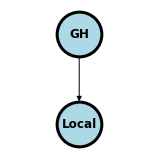

In [2]:
plt.figure(figsize=[2, 2])
G = nx.DiGraph()

G.add_node("GH",    pos = (.5, 1) )
G.add_node("Local", pos = (.5, 0))
G.add_edge("GH", "Local")
#G.add_edge("Local", "GH")
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 2000,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.3, 1.3])
ax.set_ylim([-.3, 1.3])
plt.show()

There might be changes that you want represented locally that were changed on the remote repository; for example, you might edit a readme file through github's web interface. The command for this is really easy, it's just pull

```
git pull
```

The pain occurs if you have made local changes that are in conflict with the remote changes. I'd write about merge conflicts, but I can't, I just can't (*shudder*). [Here's some docs on managing merge conflicts]
(https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/addressing-merge-conflicts/resolving-a-merge-conflict-using-the-command-line).

#### Cloning

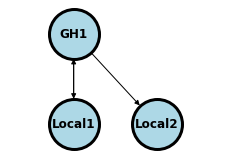

In [3]:
plt.figure(figsize=[3, 2])
G = nx.DiGraph()

G.add_node("GH1",    pos = (.5, 1) )
G.add_node("Local1", pos = (.5, 0))
G.add_node("Local2", pos = (1.5, 0))

G.add_edge("GH1", "Local1")
G.add_edge("Local1", "GH1")
G.add_edge("GH1", "Local2")

#G.add_edge("Local", "GH")
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 2500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.3, 2.3])
ax.set_ylim([-.3, 1.3])
plt.show()

To clone a remote repository is to simply create a local copy where you can pull changes from the remote. If a repository is public and you own it, then you can clone it and push changes back to the remote. If you don't, you can clone and pull changes, but then can't push back to the remote.

Try with the book repo, clone it so you have access to the files. In the figure below the owner can pull and push to the repo. In the picture below, consider that you clone GH1 off of github to you. You can pull updates from GH1 but can't push changes to GH1. The owner of GH1 of course can pull and push.

As an example, close this book (via https) with:

```
git clone https://github.com/smart-stats/ds4bio_book.git
```

#### Forking

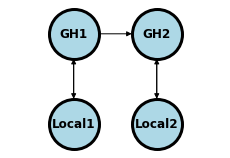

In [4]:
plt.figure(figsize=[3, 2])
G = nx.DiGraph()

G.add_node("GH1",    pos = (.5, 1) )
G.add_node("GH2",    pos = (1.5, 1) )
G.add_node("Local1", pos = (.5, 0))
G.add_node("Local2", pos = (1.5, 0))

G.add_edge("GH1", "Local1")
G.add_edge("Local1", "GH1")
G.add_edge("GH1", "GH2")
G.add_edge("GH2", "Local2")
G.add_edge("Local2", "GH2")


#G.add_edge("Local", "GH")
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 2500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.3, 2.3])
ax.set_ylim([-.3, 1.3])
plt.show()

A common workflow for github is to "fork" the repository. This differs from cloning in the sense that your fork is an entirely separate new copy. In the picture above, GH2 is a fork of GH1. It can pull upstream changes from GH1, but can't write to it, since you don't own that repo. You can push and pull from Local2 which is connected to GH2.

Forking on github is easy. Just click the "fork" button in the upper right corner.

#### Pull requests

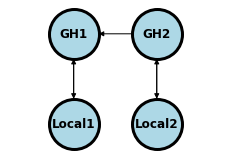

In [5]:
plt.figure(figsize=[3, 2])
G = nx.DiGraph()

G.add_node("GH1",    pos = (.5, 1) )
G.add_node("GH2",    pos = (1.5, 1) )
G.add_node("Local1", pos = (.5, 0))
G.add_node("Local2", pos = (1.5, 0))

G.add_edge("GH1", "Local1")
G.add_edge("Local1", "GH1")
G.add_edge("GH2", "GH1")
G.add_edge("GH2", "Local2")
G.add_edge("Local2", "GH2")


#G.add_edge("Local", "GH")
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 2500,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.3, 2.3])
ax.set_ylim([-.3, 1.3])
plt.show()

Imagine a case where you forked the book repo and have some great additions (maybe a section on merge conflicts?). You think that these changes you think should be represented for other students. You can't push changes to my repo; the very idea would be perposterous! How do you get your great changes represented in my repo?

You issue a *pull request* in the sense of requesting GH1 to pull your changes from GH2. Then, I would get notified of the pull request and would decide whether or not to merge them into my repo.  This system has many benefits, and particularly, is great for operating on open source projects. 

I like to do pull requests directly on github through the web interface.

## Branching

You often want multiple versions of a repository. For example, you might want a development version, a working version and a stable version. This is what branches are for in git. To create and switch to a branch called `dev`, use:

```
git checkout -b dev
```

This creates a new branch called `dev` and switches to that branch. If you already have `dev`, use `checkout` without `-b`. Suppose you want to merge your change from `dev` into your default branch (`main`)
```
git checkout main
git merge dev
```
Start very basic with branches, then when you get the hang of it you can use it like a pro. [Here's more documentation](https://git-scm.com/book/en/v2/Git-Branching-Basic-Branching-and-Merging).

# Clients

You can avoid the command line stuff with a git client, of which there are many. It's still good to know the command line options, for remote work if nothing else. I've tried several git clients and my favorite is the github client software and magit in emacs.